In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Mexico  = pd.read_csv('Mexico.csv')

In [3]:
# Verificamos información del dataframe
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   last_scraped                                  26582 non-null  object 
 2   name                                          26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_name                                     26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_is_superhost                             26582 non-null  object 
 8   host_identity_verified                        26582 non-null  object 
 9   neighbourhood                                 26582 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Mexico['review_scores_checkin'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: review_scores_checkin
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Mexico['review_scores_checkin'].max()
Min = Mexico['review_scores_checkin'].min()
Limites = [Min, Max]
Limites

[4.0, 5.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

1.0

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 26582

ni = 1 + 3.32 * np.log10(n)
ni

15.689631010177528

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.06373636189094067

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (4, 5, 16)
intervalos

array([4.        , 4.06666667, 4.13333333, 4.2       , 4.26666667,
       4.33333333, 4.4       , 4.46666667, 4.53333333, 4.6       ,
       4.66666667, 4.73333333, 4.8       , 4.86666667, 4.93333333,
       5.        ])

In [10]:
# Creamos las categorías
categorias = [ "Categoria1", "Categoria2", "Categoria3", "Categoria4", "Categoria5", "Categoria6", "Categoria7", "Categoria8", "Categoria9", "Categoria10", "Categoria11", "Categoria12", "Categoria13", "Categoria14", "Categoria15" ]

In [11]:
# Creamos las ctegorias en la columna numerica
Mexico['review_scores_checkin'] = pd.cut ( x = Mexico ['review_scores_checkin'], bins = intervalos, labels = categorias )
Mexico['review_scores_checkin']

0        Categoria14
1        Categoria14
2        Categoria15
3        Categoria15
4        Categoria15
            ...     
26577    Categoria14
26578    Categoria14
26579    Categoria14
26580    Categoria14
26581    Categoria14
Name: review_scores_checkin, Length: 26582, dtype: category
Categories (15, object): ['Categoria1' < 'Categoria2' < 'Categoria3' < 'Categoria4' ... 'Categoria12' < 'Categoria13' < 'Categoria14' < 'Categoria15']

In [12]:
table1 = freq_tbl(Mexico['review_scores_checkin'])
table1

,review_scores_checkin,frequency,percentage,cumulative_perc
0,Categoria15,10587,0.398277,0.402609
1,Categoria14,8564,0.322173,0.728286
2,Categoria13,2369,0.089120,0.818375
3,Categoria12,1846,0.069445,0.888576
4,Categoria11,1194,0.044918,0.933982
5,Categoria9,405,0.015236,0.949384
6,Categoria10,388,0.014596,0.964139
7,Categoria8,385,0.014483,0.978780
8,Categoria5,150,0.005643,0.984484
9,Categoria7,117,0.004401,0.988934


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,review_scores_checkin,frequency
0,Categoria15,10587
1,Categoria14,8564
2,Categoria13,2369
3,Categoria12,1846
4,Categoria11,1194
5,Categoria9,405
6,Categoria10,388
7,Categoria8,385
8,Categoria5,150
9,Categoria7,117


In [14]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('review_scores_checkin')
Filtro_index

,frequency
review_scores_checkin,
Categoria15,10587
Categoria14,8564
Categoria13,2369
Categoria12,1846
Categoria11,1194
Categoria9,405
Categoria10,388
Categoria8,385
Categoria5,150


Text(0, 0.5, 'Frecuencia')

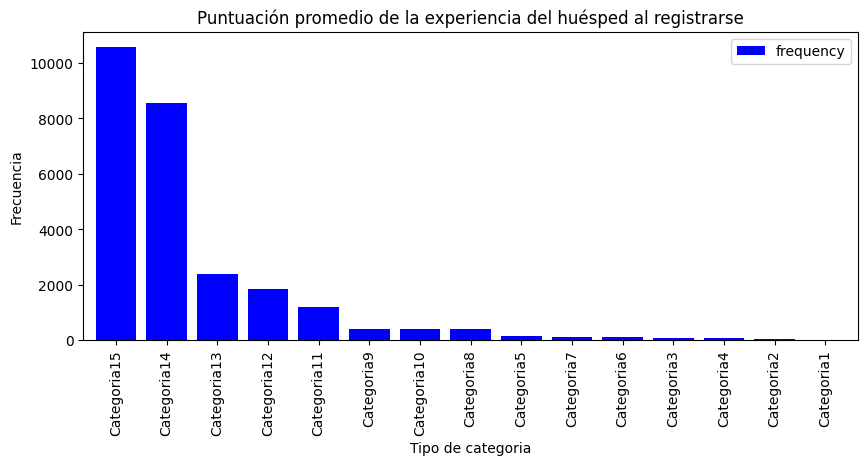

In [15]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Puntuación promedio de la experiencia del huésped al registrarse')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')